In [75]:
import simpy
import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [61]:
def source(env, customerNumber, interval, servers, serviceTime, waitTimes, verbose):
    """Source generates customers randomly"""
    for i in range(customerNumber):
        c = customer(env, 'Customer%02d' % i, servers, serviceTime, waitTimes, verbose)
        env.process(c)
        t = random.expovariate(1.0 / interval) # markovian arrival rate
        yield env.timeout(t)


def customer(env, name, servers, serviceTime, waitTimes, verbose):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if verbose:
        print('%7.4f %s: Here I am' % (arrive, name))

    with servers.request() as req:
        # Wait for the counter or abort at the end of our tether
        yield req

        wait = env.now - arrive
        waitTimes.append(wait)
        # We got to the counter
        if verbose:
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        tib = random.expovariate(1.0 / serviceTime) # markovian service rate
        yield env.timeout(tib)
        if verbose:
            print('%7.4f %s: Finished' % (env.now, name))



In [95]:
def runSim(num_sim, capacity, waitTimes, verbose=False):
    for i in range(NUM_SIM):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity)
        # we scale the arrival rate with the number of servers, so system load is stable
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS/capacity, servers, SERVICE_TIME, waitTimes, verbose))
        env.run()

In [112]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 500 # Total number of customers per run
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds, 1/lambda
SERVICE_TIME = 9.5 # time spend at a server, mu
NUM_SIM = 3
random.seed(RANDOM_SEED)

In [113]:
waitTimes1 = []
runSim(3, 1, waitTimes1)

In [114]:
waitTimes2 = []
runSim(3, 2, waitTimes2)

In [115]:
waitTimes4 = []
runSim(3,4, waitTimes4)

Text(0.5, 1.0, '4 servers')

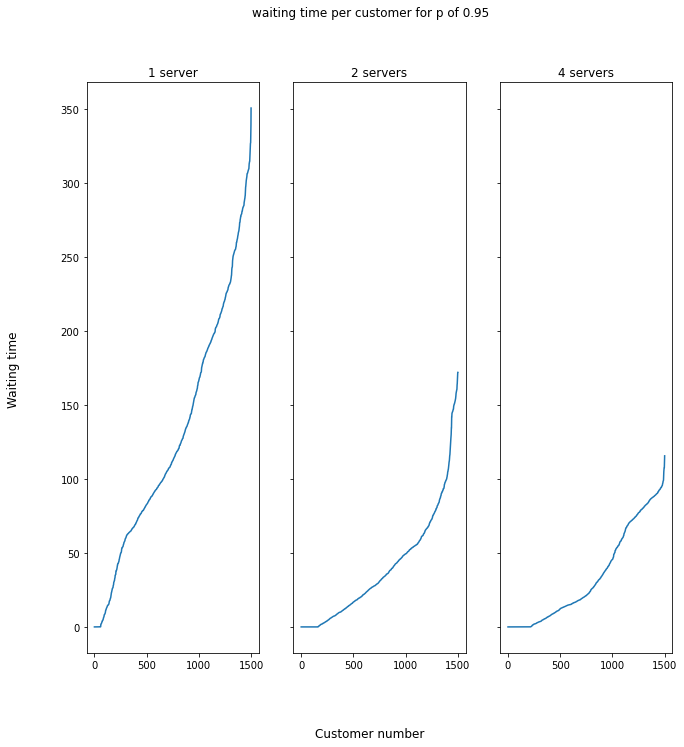

In [135]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {SERVICE_TIME/INTERVAL_CUSTOMERS}")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [116]:
np.mean(waitTimes1)

129.98536496317337

In [117]:
np.mean(waitTimes2)

40.21858830007422

In [118]:
np.mean(waitTimes4)

34.50912266731463

In [119]:
st.ttest_ind(waitTimes1, waitTimes2)

Ttest_indResult(statistic=37.63926544465078, pvalue=2.9621069320658597e-254)

In [120]:
st.ttest_ind(waitTimes1, waitTimes4)

Ttest_indResult(statistic=41.01306269893129, pvalue=2.8027999329253622e-292)